<a href="https://colab.research.google.com/github/thefr33radical/codeblue/blob/master/temp/dataminigproj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


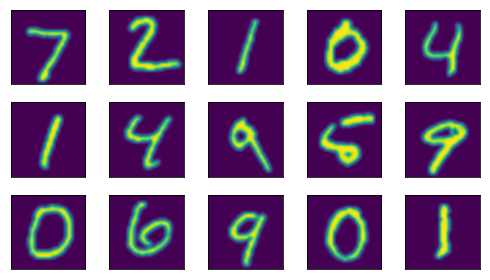

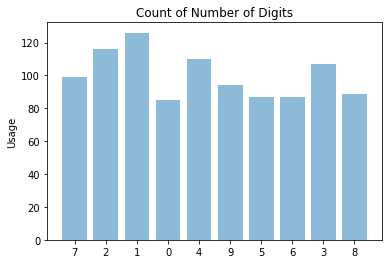

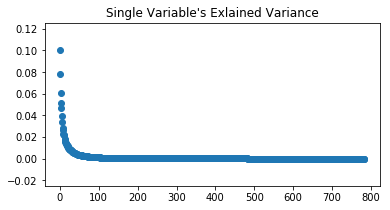

BASELINE MODEL


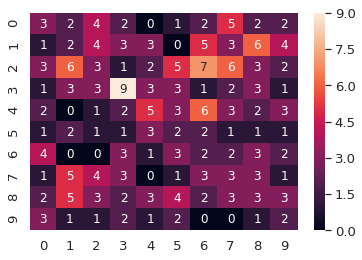

 True Positives for each class [3. 2. 3. 9. 5. 2. 2. 3. 3. 2.]
 True Negatives for each class [209. 195. 191. 202. 207. 213. 202. 201. 196. 218.]
 False Positives for each class [18. 24. 21. 19. 16. 22. 28. 25. 24. 19.]
 False Negatives for each class [20. 29. 35. 20. 22. 13. 18. 21. 27. 11.]
 Accuracy for each class [20. 29. 35. 20. 22. 13. 18. 21. 27. 11.]
 Overall Accuracy: 13.600000000000001
--- ------------------
RANDOM FOREST MODEL


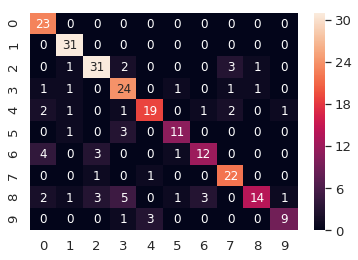

 True Positives for each class [23. 31. 31. 24. 19. 11. 12. 22. 14.  9.]
 True Negatives for each class [218. 214. 205. 209. 219. 232. 226. 220. 218. 235.]
 False Positives for each class [ 9.  5.  7. 12.  4.  3.  4.  6.  2.  2.]
 False Negatives for each class [ 0.  0.  7.  5.  8.  4.  8.  2. 16.  4.]
 Accuracy for each class [ 0.  0.  7.  5.  8.  4.  8.  2. 16.  4.]
 Overall Accuracy: 78.4
-- ------------------
KNN MODEL


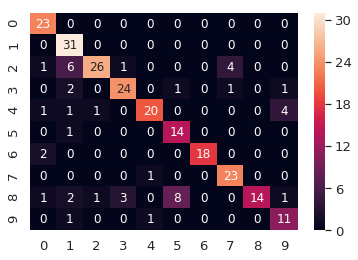

 True Positives for each class [23. 31. 26. 24. 20. 14. 18. 23. 14. 11.]
 True Negatives for each class [222. 206. 210. 217. 221. 226. 230. 221. 220. 231.]
 False Positives for each class [ 5. 13.  2.  4.  2.  9.  0.  5.  0.  6.]
 False Negatives for each class [ 0.  0. 12.  5.  7.  1.  2.  1. 16.  2.]
 Accuracy for each class [ 0.  0. 12.  5.  7.  1.  2.  1. 16.  2.]
 Overall Accuracy: 81.6
-- ------------------
SVM MODEL


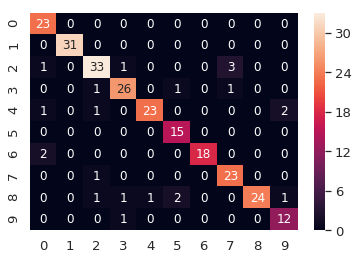

 True Positives for each class [23. 31. 33. 26. 23. 15. 18. 23. 24. 12.]
 True Negatives for each class [223. 219. 208. 218. 222. 232. 230. 222. 220. 234.]
 False Positives for each class [4. 0. 4. 3. 1. 3. 0. 4. 0. 3.]
 False Negatives for each class [0. 0. 5. 3. 4. 0. 2. 1. 6. 1.]
 Accuracy for each class [0. 0. 5. 3. 4. 0. 2. 1. 6. 1.]
 Overall Accuracy: 91.2
-- ------------------


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR MODEL


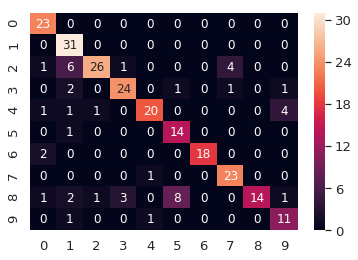

 True Positives for each class [23. 31. 26. 24. 20. 14. 18. 23. 14. 11.]
 True Negatives for each class [222. 206. 210. 217. 221. 226. 230. 221. 220. 231.]
 False Positives for each class [ 5. 13.  2.  4.  2.  9.  0.  5.  0.  6.]
 False Negatives for each class [ 0.  0. 12.  5.  7.  1.  2.  1. 16.  2.]
 Accuracy for each class [ 0.  0. 12.  5.  7.  1.  2.  1. 16.  2.]
 Overall Accuracy: 81.6
-- ------------------
EnsembleMODEL


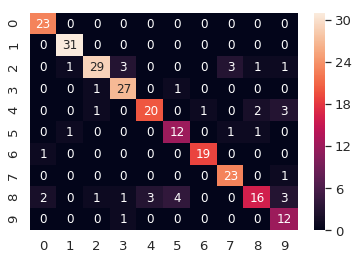

 True Positives for each class [23. 31. 29. 27. 20. 12. 19. 23. 16. 12.]
 True Negatives for each class [224. 217. 209. 216. 220. 230. 229. 222. 216. 229.]
 False Positives for each class [3. 2. 3. 5. 3. 5. 1. 4. 4. 8.]
 False Negatives for each class [ 0.  0.  9.  2.  7.  3.  1.  1. 14.  1.]
 Accuracy for each class [ 0.  0.  9.  2.  7.  3.  1.  1. 14.  1.]
 Overall Accuracy: 84.8
-- ------------------


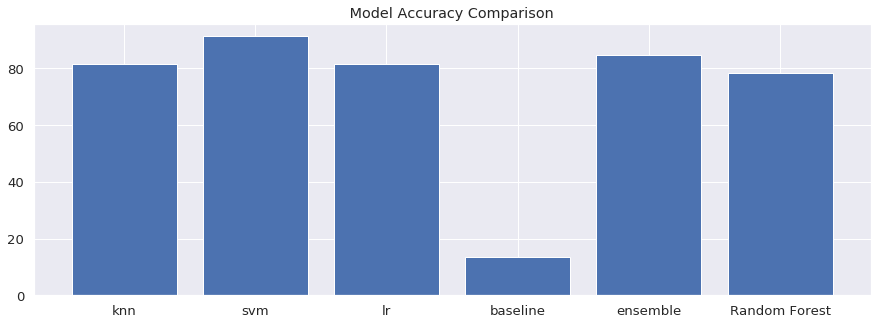

In [1]:

import numpy as np
import pandas as pd
import cv2
from collections import Counter

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

class DigitRecognizer(object):

    def __init__(self):
        pass

    # Function to read data
    def load_data(self):
        """
        """
        data = pd.read_csv("https://raw.githubusercontent.com/thefr33radical/codeblue/master/temp/mnist_test.csv",header='infer')
        # The first column is the label
        label = data.iloc[:1000,0]
        train_data = data.iloc[:1000,1:]       
        return train_data,label

    # Function to perform Data Analysis
    def data_analysis(self,data_x,data_y):
        """
        """
        # The rest of columns are pixels
        x=data_x
        pixels = data_x
        pixels = np.array(pixels, dtype='uint8')
        print(" ")
        # plot some of the MNIST numbers
  
        
        plt.figure(figsize=(7,4))
        plt.title(' Digit Representation ')
        
        # plot 40 pictures
        for i in range(0,15):
            plt.subplot(3,5,i + 1)
            # reshape from 1d to 2d pixel array
            grid_data = data_x.iloc[i].as_matrix().reshape(28,28)
            plt.imshow(grid_data, interpolation = "bicubic")
            # hide x, y axes
            plt.xticks([])
            plt.yticks([])
        plt.tight_layout()
        
        plt.show()

        # Bar plot to count number of Digits
        o = Counter(data_y)      
        objects = o.keys()
        pos = np.arange(len(objects))
        performance = o.values()

        plt.bar(pos, performance, align='center', alpha=0.5)
        plt.xticks(pos, objects)
        plt.ylabel('Usage')
        plt.title('Count of Number of Digits')
        plt.show()

        # Determine explained variance of each variables
        pca = PCA(n_components=784).fit(data_x)
        plt.figure(figsize=(6,3))
        plt.scatter(list(range(784)), pca.explained_variance_ratio_)
        plt.title("Single Variable's Exlained Variance")
        plt.show()
        

    # Function to train models
    def fit(self,data_x,data_y):
        """
        """
        X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.25, random_state=42)
        mod= MODELS()
        mod.train_models(X_train, X_test, y_train, y_test)
        #mod.ensemble(X_train, X_test, y_train, y_test)

class MODELS(object):
    def __init__(self):
        self.rf = RandomForestClassifier(n_estimators=10)
        self.knn = KNeighborsClassifier()
        self.svm=SVC(gamma='scale',probability=True)
        self.lr=LogisticRegression(multi_class='auto')

    def train_models(self,x_train, x_test, y_train, y_test):
        # INDIVIDUAL MODELS
        prf= PerfMetric()

        # Baseline Model
        results_baseline=np.random.randint(0,10,len(y_test))
        print("BASELINE MODEL")
        print("---",prf.confusion_matrix(y_test,results_baseline))
        
        # Random Forest         
        self.rf.fit(x_train,y_train)
        results_rf=self.rf.predict(x_test)
        print("RANDOM FOREST MODEL")
        print("--",prf.confusion_matrix(y_test,results_rf))

        # KNN         
        self.knn.fit(x_train, y_train)
        results_knn=self.knn.predict(x_test)
        print("KNN MODEL")
        print("--",prf.confusion_matrix(y_test,results_knn))
       
        # SVM
        self.svm.fit(x_train, y_train)
        results_svm=self.svm.predict(x_test)
        print("SVM MODEL")
        print("--",prf.confusion_matrix(y_test,results_svm))

        # Logistic Regression
        self.lr.fit(x_train, y_train)
        results_lr=self.knn.predict(x_test)
        print("LR MODEL")
        print("--",prf.confusion_matrix(y_test,results_lr))

        results_ensemble=[]
        for i in range(len(x_test)):
            maximum, max_classifier,max_class=self.ensemble_predict(x_test.iloc[i,:])
            results_ensemble.append([maximum, max_classifier,max_class])
        results_ensemble=np.array(results_ensemble)
        print("EnsembleMODEL")
       
        print("--",prf.confusion_matrix(y_test,np.array(results_ensemble[:,2],dtype=int)))
        
        acc_models=[]
        acc_models.append(accuracy_score(y_test,results_knn)*100)
        acc_models.append(accuracy_score(y_test,results_svm)*100)
        acc_models.append(accuracy_score(y_test,results_lr)*100)
        acc_models.append(accuracy_score(y_test,results_baseline)*100)
        acc_models.append(accuracy_score(y_test,np.array(results_ensemble[:,2],dtype=int))*100)
        acc_models.append(accuracy_score(y_test,results_rf)*100)
        
        plt.figure(figsize=(15,5))
        plt.title(' Model Accuracy Comparison ')
        labels = ("knn","svm","lr","baseline","ensemble","Random Forest")
        y_pos = np.arange(len(labels))
        plt.bar(y_pos, acc_models)
 
        # Create names on the x-axis
        plt.xticks(y_pos, labels)
 
        # Show graphic
        plt.show()

    def ensemble_predict(self,test_input):
        ensemble=[]
        test_input=np.array(test_input).reshape(1,-1)
        # ensemble = [ (class, probability_score,classifier name),   (class, probability_score,classifier name)...... ]
        #print( ((self.knn.predict(test_input))))
        #print( np.max(self.knn.predict_proba(test_input),axis=1))

        ensemble.append(( self.svm.predict(test_input)[0], np.max(self.svm.predict_proba(test_input)), "svm"  ))
        ensemble.append(
            (self.lr.predict(test_input)[0], np.max(self.lr.predict_proba(test_input)), "lr"))
        ensemble.append(
            (self.rf.predict(test_input)[0], np.max(self.rf.predict_proba(test_input)), "rf" ))
        ensemble.append(
                (self.knn.predict(test_input)[0], np.max(self.knn.predict_proba(test_input)), "knn" ))
        maximum = ensemble[0][1]
        max_classifier=""
        max_class=0

        # The best conidence score is taken along with classifier name, class
        for i in ensemble:
            if i[1]> maximum:
                max_class=i[0]
                maximum=i[1]
                max_classifier=i[2]

        return maximum, max_classifier,max_class
       
class PerfMetric(object):
    """
    Module comprising performance metrics 
    """        
    def confusion_matrix(self,actual_output,predicted_output):
        
        """
        Function to Compute Precesion, Accuracy, Sensitivity, Specificity
        :param predicted_output:
        :param actual_output:
        :return: Precesion, Accuracy, Sensitivity, Specificity
        """  
        label=np.arange(0,10)
        cnf_matrix = confusion_matrix(actual_output,predicted_output,labels=label)           
        sns.set(font_scale=1.2)#for label size
        sns.heatmap(cnf_matrix, annot=True,annot_kws={"size": 12})
        plt.show()

        FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  

        FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
        TP = np.diag(cnf_matrix)
        TN = cnf_matrix.sum() - (FP + FN + TP)

        FP = FP.astype(float)
        FN = FN.astype(float)
        TP = TP.astype(float)
        TN = TN.astype(float)
        
        print(" True Positives for each class",TP)
        print(" True Negatives for each class",TN)
        print(" False Positives for each class", FP)
        print(" False Negatives for each class", FN)
        print(" Accuracy for each class", FN)
        print(" Overall Accuracy: " + str(accuracy_score(actual_output,predicted_output)*100))
        return "------------------"

                
if __name__=="__main__":
    obj=DigitRecognizer()
    data_x,data_y = obj.load_data()
    obj.data_analysis(data_x,data_y)
    obj.fit(data_x,data_y)
    
    
    